<a href="https://colab.research.google.com/github/jakechinmk/data_science/blob/main/german_credit_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup
## Download Data & Install Relevant Package

In [ ]:
# !wget https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data
# !pip install pandas-profiling
# !pip install dataprep

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from dataprep import eda

NumExpr defaulting to 2 threads.


## Display Settings

In [ ]:
sns.set_theme(style="ticks")
pd.options.display.max_columns = None

# Data
## Read Data

In [ ]:
path = 'german.data'
df = pd.read_csv(path, header=None, sep=' ')
cols  = [
         'existing_checking_account_status',
         'duration_mth',
         'credit_history',
         'purpose',
         'credit_amount',
         'saving_accounts_or_bonds',
         'present_employment_since',
         'installment_rate_percent', # disposable income
         'personal_status_sex',
         'other_debtors_or_guarantors',
         'present_residence_since',
         'property',
         'age_years',
         'other_installment_plans',
         'housing',
         'no_of_existing_credits', # in this bank
         'job',
         'no_of_ppl_liable',
         'telephone',
         'foreign_worker',
         'label' 
]

df.columns = cols
df.loc[:, 'label'] = np.where(df.label == 2, 1, 0)
single_status_code = ['A93', 'A95']
df.loc[:, 'personal_status'] = np.where(df.personal_status_sex.isin(single_status_code), 0, 1)


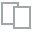
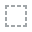
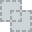
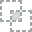
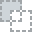
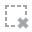
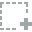
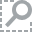
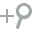
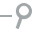
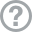
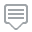
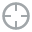
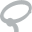
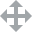
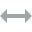
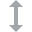
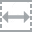
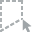
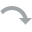
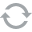
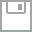
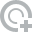
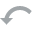
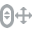
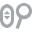
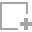
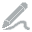
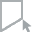
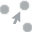
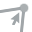
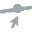

In [ ]:
eda.plot(df)


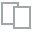
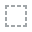
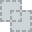
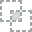
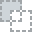
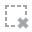
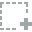
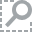
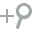
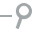
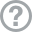
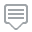
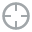
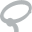
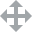
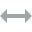
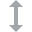
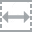
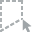
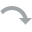
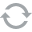
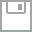
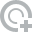
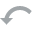
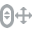
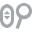
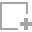
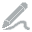
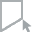
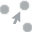
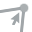
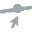

In [ ]:
mask = df.label == 0
df_good = df.loc[mask, :].drop('label', axis=1)
df_bad = df.loc[~mask, :].drop('label', axis=1)
eda.plot_diff([df_good, df_bad], config={'diff.label':['good', 'bad']})

In [ ]:
report = eda.create_report(df)
report.show_browser()
report.save(filename='eda_report')

Report has been saved to /content/eda_report.html!



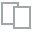
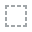
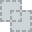
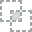
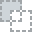
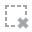
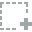
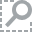
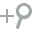
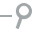
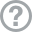
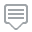
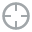
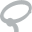
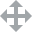
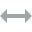
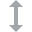
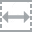
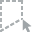
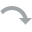
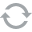
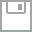
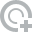
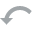
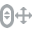
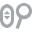
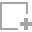
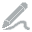
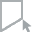
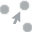
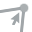
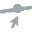

In [ ]:
eda.plot_correlation(df)

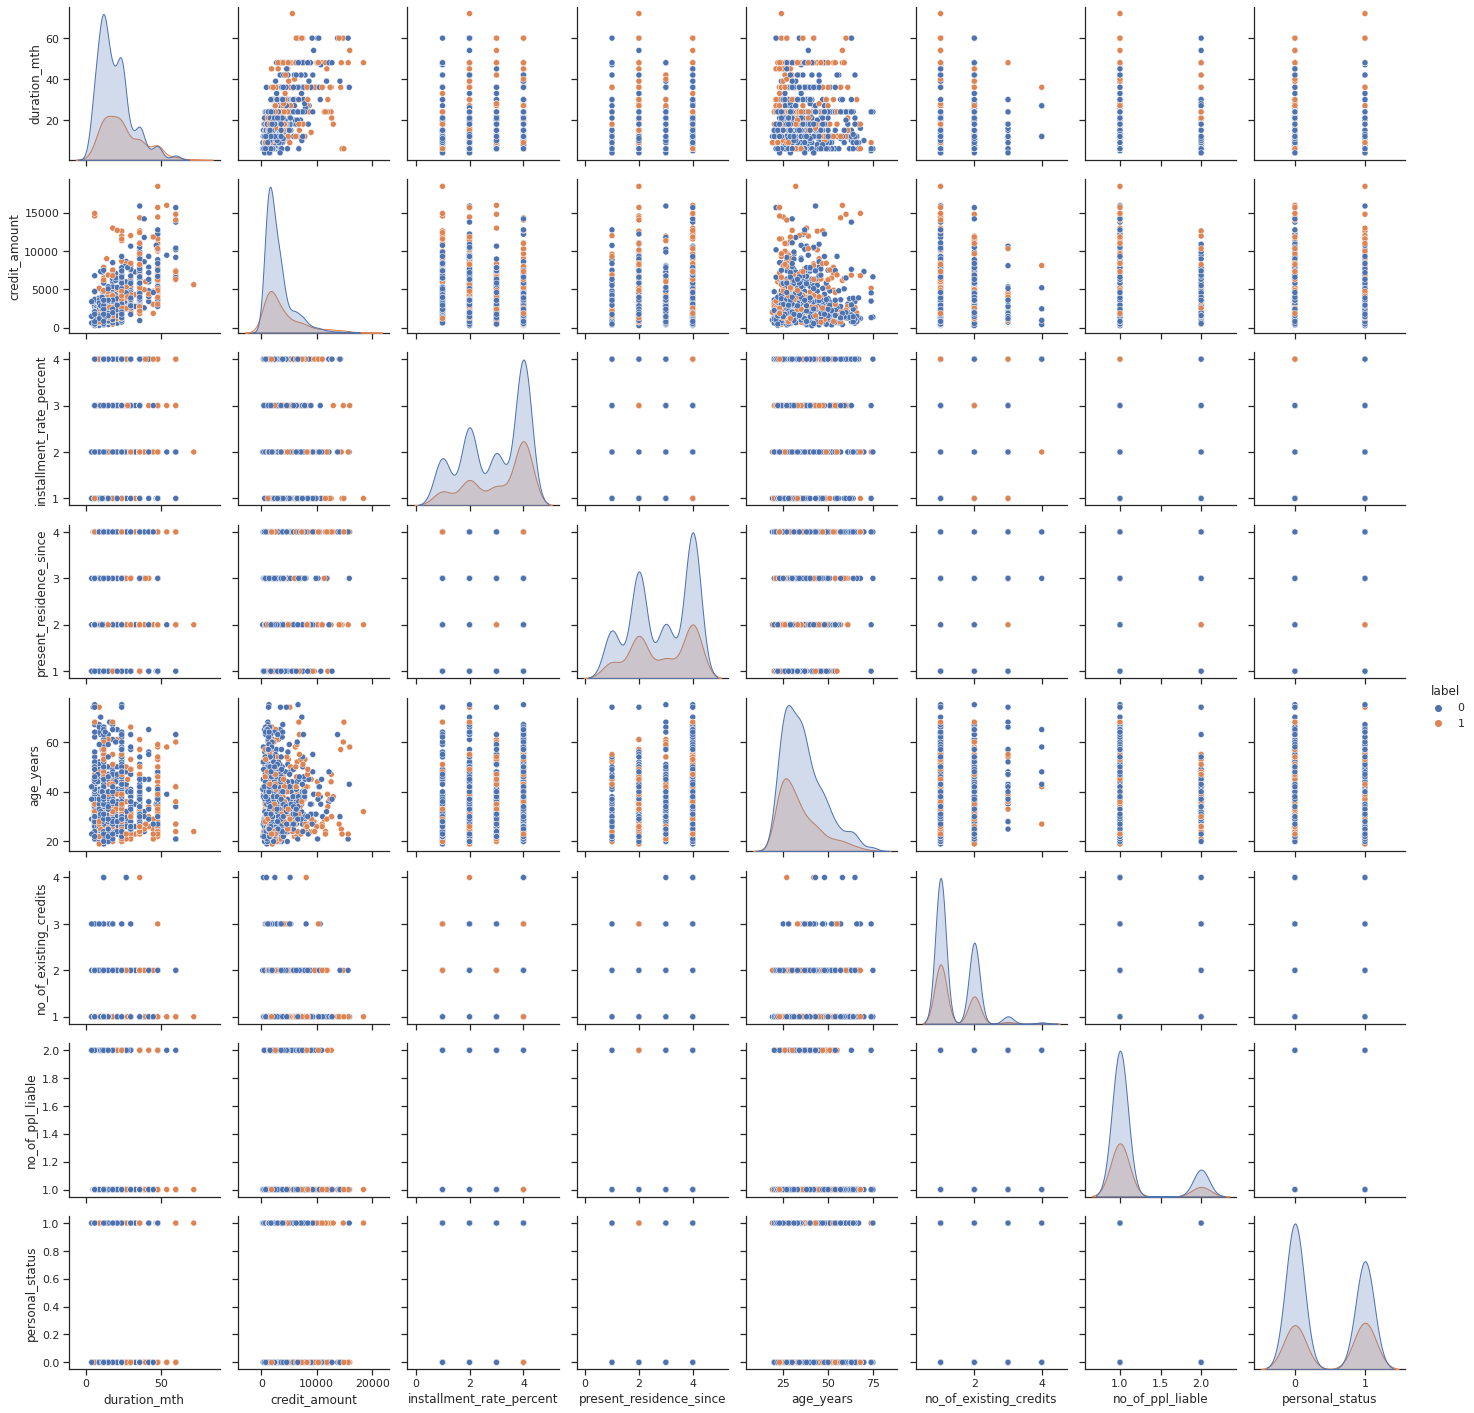

In [ ]:
sns.pairplot(df, hue='label')